In [1]:
import numpy as np
import matplotlib.pyplot as plt

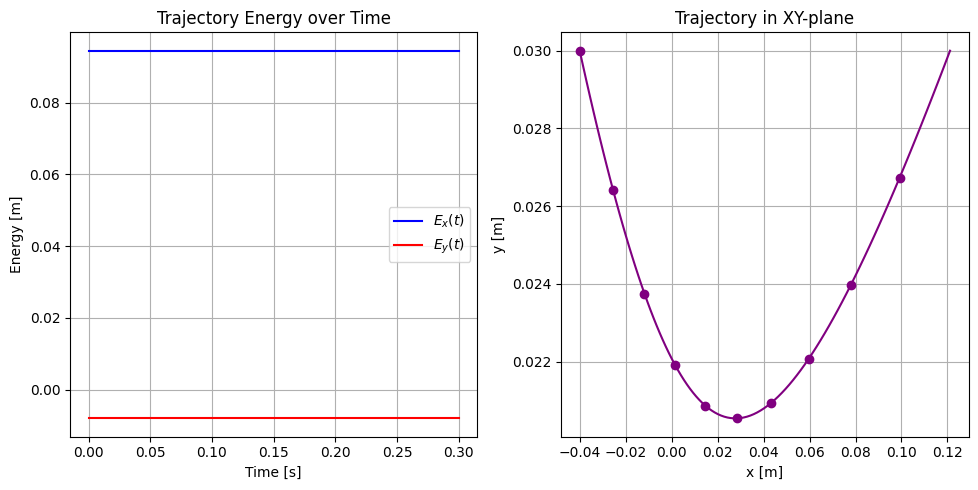

In [2]:
# --- パラメータの設定 ---
g = 9.81
z = 257.4 * 0.001
Tc = np.sqrt(z/g) # 時定数

# 初期状態 [位置, 速度]
x0, vx0 = -0.04, 0.5
y0 = 0.03

# one step time
T_sup = 0.3

vy0 = (y0/Tc) * ( np.sinh(T_sup/Tc) / ( -1 - np.cosh(T_sup/Tc) ) )

# 時間軸の設定 (0秒から1.0秒まで)
t = np.linspace(0, T_sup, 100)

# --- 関数の計算 ---
# x(t) = x(0)*cosh(t/Tc) + Tc*x_dot(0)*sinh(t/Tc)
x_t = x0 * np.cosh(t/Tc) + Tc * vx0 * np.sinh(t/Tc)
y_t = y0 * np.cosh(t/Tc) + Tc * vy0 * np.sinh(t/Tc)

vx_t = x0 / Tc * np.sinh(t/Tc) + vx0 * np.cosh(t/Tc)
vy_t = y0 / Tc * np.sinh(t/Tc) + vy0 * np.cosh(t/Tc)

# --- プロット ---
plt.figure(figsize=(10, 5))

# 1. trajectory energy
ex_t = 1/2 * vx_t*vx_t - 1/2 * (x_t/Tc)*(x_t/Tc)
ey_t = 1/2 * vy_t*vy_t - 1/2 * (y_t/Tc)*(y_t/Tc)

plt.subplot(1, 2, 1)
plt.plot(t, ex_t, label='$E_x(t)$', color='blue')
plt.plot(t, ey_t, label='$E_y(t)$', color='red')
plt.title('Trajectory Energy over Time')
plt.xlabel('Time [s]')
plt.ylabel('Energy [m]')
plt.legend()
plt.grid(True)

# 2. XY平面上の軌跡
plt.subplot(1, 2, 2)
plt.plot(x_t, y_t, marker='o', markevery=10, color='purple')
plt.title('Trajectory in XY-plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
def calc_basic_foot_pos(v, T_sup):
    return Tc*v * (np.cosh(T_sup/Tc)-1) / np.sinh(T_sup/Tc)

def calc_y_vel(y0, T_sup):
    return (y0/Tc) * ( np.sinh(T_sup/Tc) / ( -1 - np.cosh(T_sup/Tc) ) )

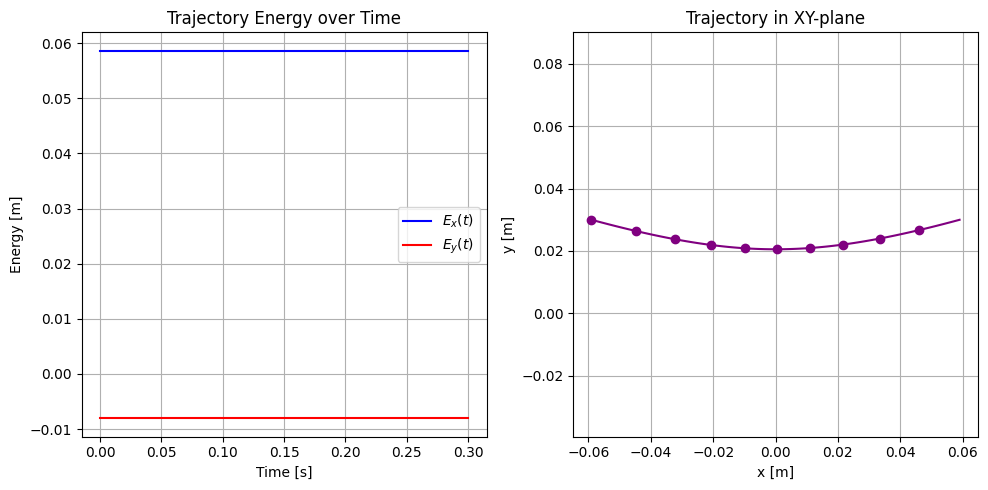

In [6]:
# 初期状態 [位置, 速度]
vx0 = 0.5
y0 = 0.03

# one step time
T_sup = 0.3

x0 = -1 * calc_basic_foot_pos(vx0, T_sup)
vy0 = calc_y_vel(y0, T_sup)

# 時間軸の設定 (0秒から1.0秒まで)
t = np.linspace(0, T_sup, 100)

# --- 関数の計算 ---
# x(t) = x(0)*cosh(t/Tc) + Tc*x_dot(0)*sinh(t/Tc)
x_t = x0 * np.cosh(t/Tc) + Tc * vx0 * np.sinh(t/Tc)
y_t = y0 * np.cosh(t/Tc) + Tc * vy0 * np.sinh(t/Tc)

vx_t = x0 / Tc * np.sinh(t/Tc) + vx0 * np.cosh(t/Tc)
vy_t = y0 / Tc * np.sinh(t/Tc) + vy0 * np.cosh(t/Tc)

# --- プロット ---
plt.figure(figsize=(10, 5))

# 1. trajectory energy
ex_t = 1/2 * vx_t*vx_t - 1/2 * (x_t/Tc)*(x_t/Tc)
ey_t = 1/2 * vy_t*vy_t - 1/2 * (y_t/Tc)*(y_t/Tc)

plt.subplot(1, 2, 1)
plt.plot(t, ex_t, label='$E_x(t)$', color='blue')
plt.plot(t, ey_t, label='$E_y(t)$', color='red')
plt.title('Trajectory Energy over Time')
plt.xlabel('Time [s]')
plt.ylabel('Energy [m]')
plt.legend()
plt.grid(True)

# 2. XY平面上の軌跡
plt.subplot(1, 2, 2)
plt.plot(x_t, y_t, marker='o', markevery=10, color='purple')
plt.title('Trajectory in XY-plane')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()